In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob


In [9]:
import pandas as pd

data = {
    "Student_ID": list(range(1, 31)),
    "Event_Name": ["Coding Workshop"] * 30,
    "Rating": [5,4,3,5,2,4,5,3,4,5,3,4,5,2,4,5,3,4,5,4,5,2,4,3,5,4,3,5,4,5],
    "Feedback_Text": [
        "The event was very organized and helpful",
        "I liked the practical sessions",
        "Audio quality could be better",
        "Excellent hands-on learning experience",
        "Too long and boring",
        "Speakers were clear and explained well",
        "Loved the examples and exercises",
        "The pace was fast for beginners",
        "Good content but unclear slides",
        "Overall very useful workshop",
        "Venue was noisy",
        "Enjoyed the Q&A session",
        "Mentor explained everything perfectly",
        "Lacked interactive activities",
        "Learned many new concepts",
        "Very engaging and fun",
        "Some topics were skipped",
        "Helpful examples",
        "Very professional and well managed",
        "Good structure of the session",
        "Very informative and interactive",
        "Needed more breaks",
        "Enjoyed learning by doing tasks",
        "Explanations were unclear at times",
        "Excellent event highly recommended",
        "Good content and knowledgeable speakers",
        "A bit too long",
        "Very practical and easy to understand",
        "Learned new tools",
        "Mentor was very helpful"
    ]
}

df = pd.DataFrame(data)
df.head()


,Student_ID,Event_Name,Rating,Feedback_Text
0,1,Coding Workshop,5,The event was very organized and helpful
1,2,Coding Workshop,4,I liked the practical sessions
2,3,Coding Workshop,3,Audio quality could be better
3,4,Coding Workshop,5,Excellent hands-on learning experience
4,5,Coding Workshop,2,Too long and boring


In [10]:
df.to_csv("event_feedback.csv", index=False)


In [11]:
# Check basic info
df.info()

# Remove rows with empty feedback
df.dropna(subset=["Feedback_Text"], inplace=True)

# Convert feedback text to lowercase
df["Feedback_Text"] = df["Feedback_Text"].str.lower()

# Verify cleaned data
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Student_ID     30 non-null     int64 
 1   Event_Name     30 non-null     object
 2   Rating         30 non-null     int64 
 3   Feedback_Text  30 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.1+ KB


,Student_ID,Event_Name,Rating,Feedback_Text
0,1,Coding Workshop,5,the event was very organized and helpful
1,2,Coding Workshop,4,i liked the practical sessions
2,3,Coding Workshop,3,audio quality could be better
3,4,Coding Workshop,5,excellent hands-on learning experience
4,5,Coding Workshop,2,too long and boring


In [12]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis
df["Sentiment_Score"] = df["Feedback_Text"].apply(get_sentiment)

# View results
df[["Feedback_Text", "Sentiment_Score"]].head()


,Feedback_Text,Sentiment_Score
0,the event was very organized and helpful,0.200
1,i liked the practical sessions,0.600
2,audio quality could be better,0.500
3,excellent hands-on learning experience,1.000
4,too long and boring,-0.525


In [13]:
# Function to label sentiment
def label_sentiment(score):
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

# Apply labels
df["Sentiment"] = df["Sentiment_Score"].apply(label_sentiment)

# Preview result
df[["Feedback_Text", "Sentiment_Score", "Sentiment"]].head()


,Feedback_Text,Sentiment_Score,Sentiment
0,the event was very organized and helpful,0.200,Positive
1,i liked the practical sessions,0.600,Positive
2,audio quality could be better,0.500,Positive
3,excellent hands-on learning experience,1.000,Positive
4,too long and boring,-0.525,Negative


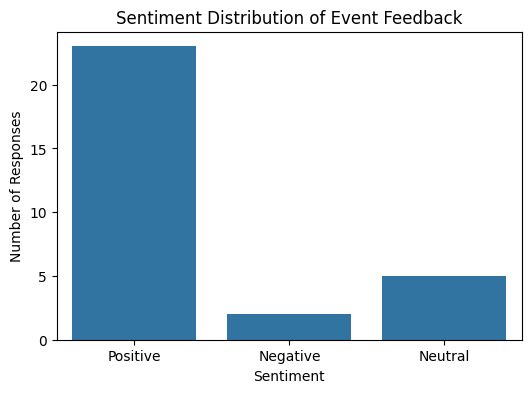

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x="Sentiment", data=df)
plt.title("Sentiment Distribution of Event Feedback")
plt.xlabel("Sentiment")
plt.ylabel("Number of Responses")
plt.show()


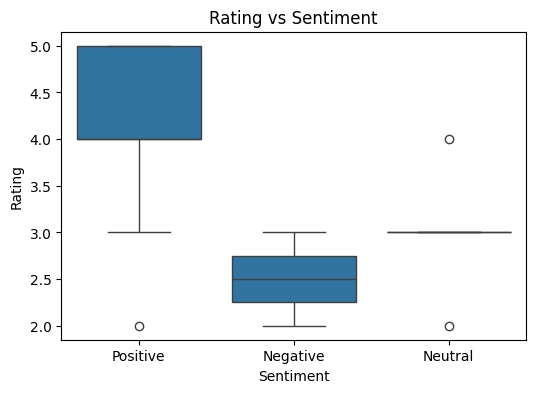

In [15]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Sentiment", y="Rating", data=df)
plt.title("Rating vs Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Rating")
plt.show()


Insights

The majority of student feedback is positive, indicating high satisfaction with the event.

Negative sentiment is mainly related to audio issues, event duration, and lack of interactivity.

Feedback with higher ratings (4–5) strongly correlates with positive sentiment, validating the sentiment analysis results.

Neutral feedback suggests students found the event useful but see room for improvement.

 Recommendations

Improve audio and venue arrangements to enhance listening experience.

Include more interactive activities such as hands-on tasks and Q&A sessions.

Optimize event duration by balancing theory and practical sessions.

Collect feedback after every event to continuously improve quality.

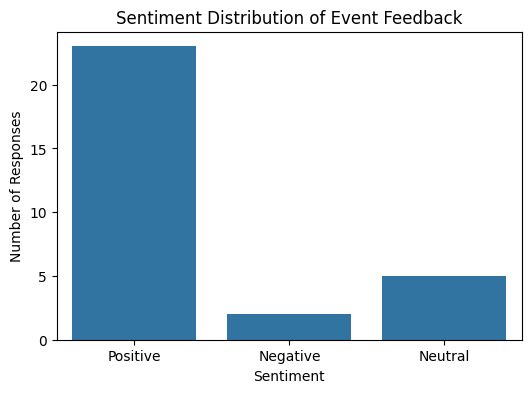

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x="Sentiment", data=df)
plt.title("Sentiment Distribution of Event Feedback")
plt.xlabel("Sentiment")
plt.ylabel("Number of Responses")

# Save the chart
plt.savefig("sentiment_distribution.png", dpi=300, bbox_inches="tight")
plt.show()


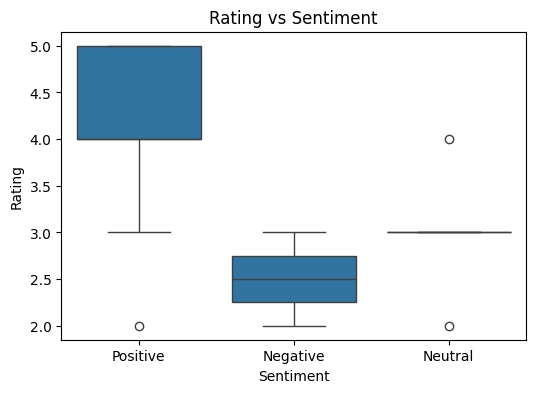

In [17]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Sentiment", y="Rating", data=df)
plt.title("Rating vs Sentiment")

plt.savefig("rating_vs_sentiment.png", dpi=300, bbox_inches="tight")
plt.show()


In [18]:
df.to_csv("cleaned_event_feedback.csv", index=False)
